<a href="https://colab.research.google.com/github/SheilaMumbi/PROJECTS-2024/blob/main/Supermarket_Data_Analysis_and_Visualization_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**


Supermarkets play a vital role in the retail sector by providing consumers with a wide range of products, from groceries to household items. In a highly competitive market, understanding the factors that influence store performance is crucial for driving sales, increasing customer satisfaction, and maintaining profitability. This case study focuses on analyzing data from various supermarket stores to uncover trends, patterns, and insights that can inform strategic decisions.

ABOUT DATA SET


The Data set contains:

Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

Daily_Customer_Count: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

# **Data Exploration and Preprocessing**

Loading the data set


In [ ]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36f8eea3fc2eb3e82b87cd978208ef7cf40d68c3e78ba78aa1332b01112efe68
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# importing data
data = '/content/Stores.csv'
df = pd.read_csv(data)

# First five rows
df.head()

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620

In [ ]:
# Structure of the data set
df.info()

# Summary of the data set
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000  
50%     58605.000000  
75%     71872.500000  
max    116320.000000

In [ ]:
df_report = ProfileReport(df)
df_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***Data Cleaning***

In [ ]:
# Checking for missing values
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

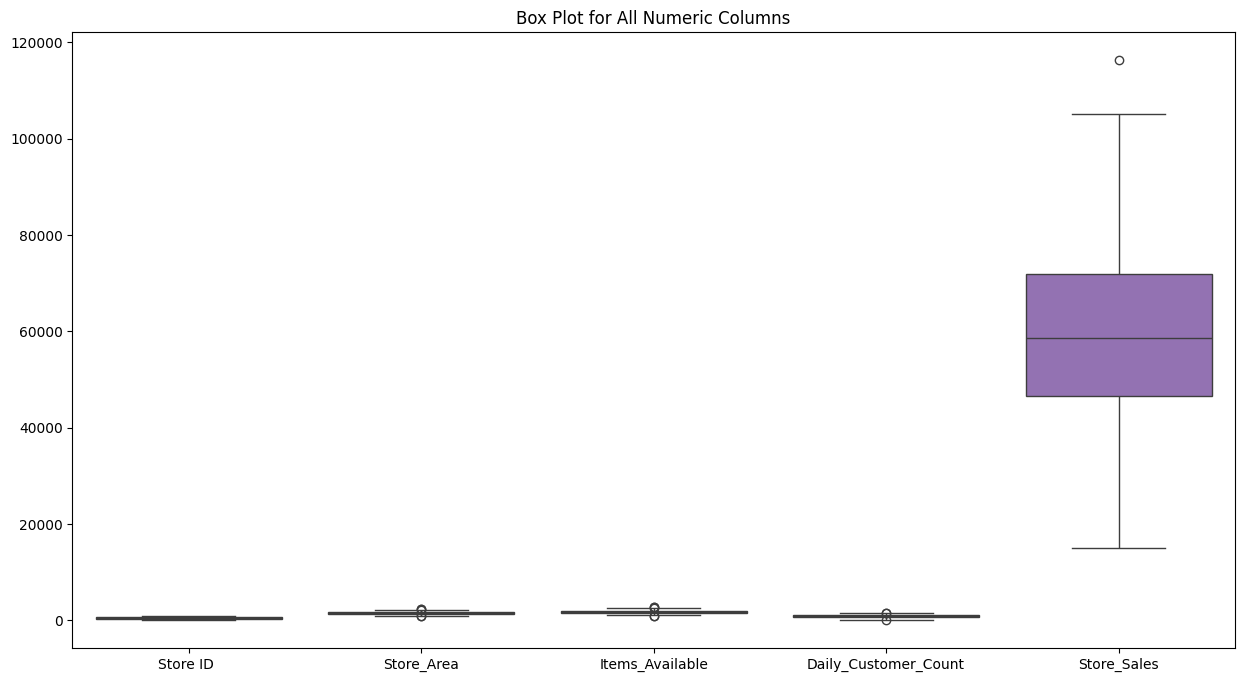

In [ ]:
# Handling outliers
# Plot box plots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Box Plot for All Numeric Columns')
plt.show()

Store_Sales: Outliers are present on the upper end, indicating that some stores have significantly higher sales compared to the rest.

In [ ]:
# To check the number of duplicate values

df.duplicated('Store_Sales').sum()

80

In [ ]:
# Remove duplicates
df_cleaned = df.drop_duplicates('Store_Sales')

#Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned


Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
811        891        1549             1851                  1220        70620
812        893        1387             1663                   850        82080
813        894        1200             1436                  1060        76440
814        895        1299             1560                   770        96610
815        896        1174             1429                  1110        54340

[816 rows x 5 columns]

In [ ]:
df_cleaned.describe()

Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  816.000000   816.000000       816.000000            816.000000   
mean   430.700980  1485.846814      1782.393382            790.306373   
std    257.714607   252.166470       302.310418            267.589612   
min      1.000000   775.000000       932.000000             10.000000   
25%    206.750000  1313.000000      1571.000000            600.000000   
50%    423.500000  1476.500000      1773.000000            780.000000   
75%    650.250000  1655.000000      1986.500000            980.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     816.000000  
mean    59216.250000  
std     17515.215013  
min     14920.000000  
25%     46047.500000  
50%     58080.000000  
75%     72027.500000  
max    116320.000000

***Initial Exploration***

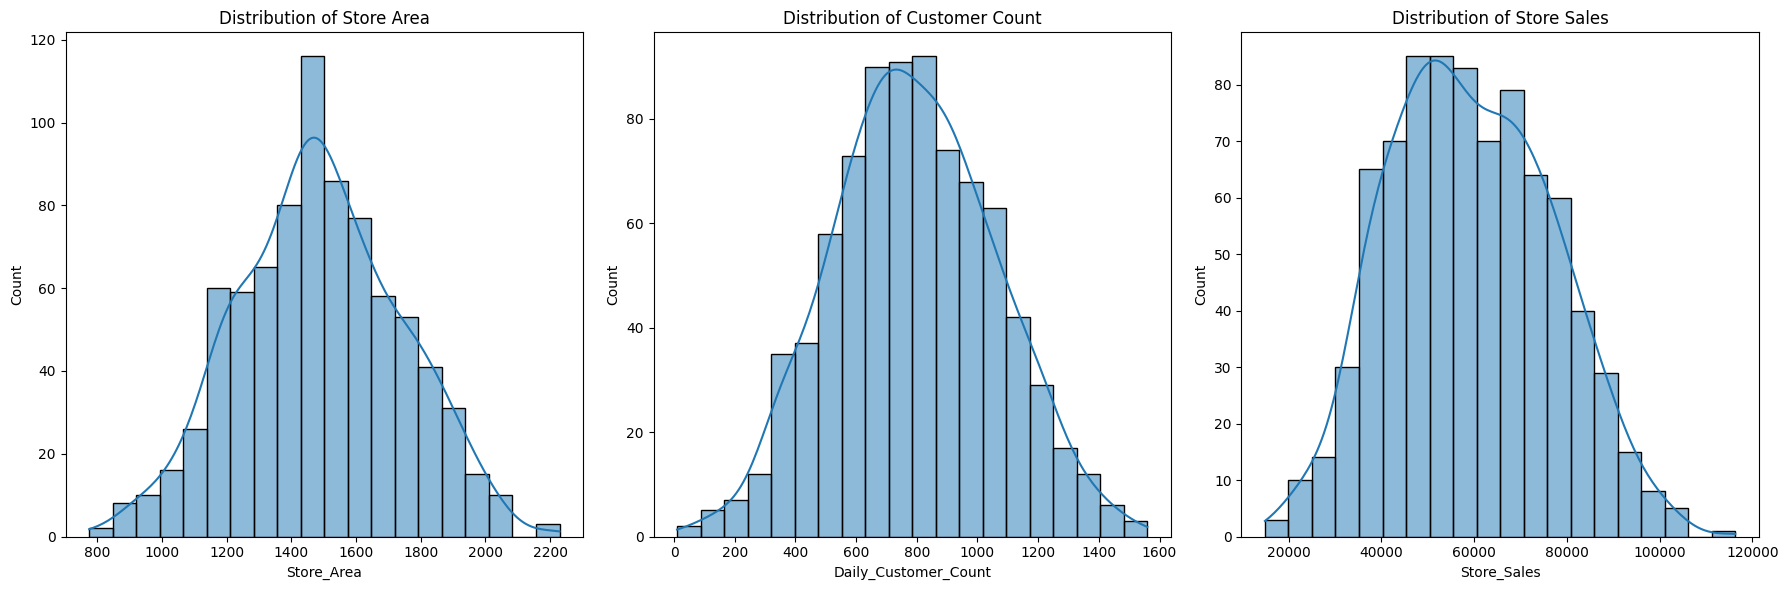

In [ ]:
# Plot histograms for each key variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df_cleaned['Store_Area'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Store Area')

sns.histplot(df_cleaned['Daily_Customer_Count'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Customer Count')

sns.histplot(df_cleaned['Store_Sales'], bins=20, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Store Sales')

plt.tight_layout()
plt.show()


# **Data Analysis**

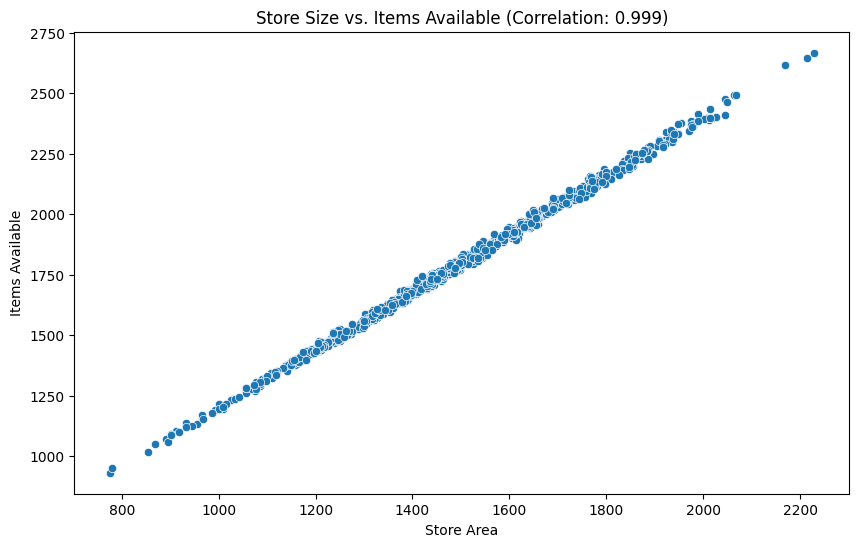

In [ ]:
# Correlation analysis between Store_Area and Items_Available
correlation_store_size_items = df['Store_Area'].corr(df['Items_Available'])
correlation_store_size_items

# Scatter plot for Store Size vs. Items Available
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Area', y='Items_Available', data=df_cleaned)
plt.title(f'Store Size vs. Items Available (Correlation: {correlation_store_size_items:.3f})')
plt.xlabel('Store Area')
plt.ylabel('Items Available')
plt.show()


Correlation between Daily Customer Count and Store Sales: 0.009


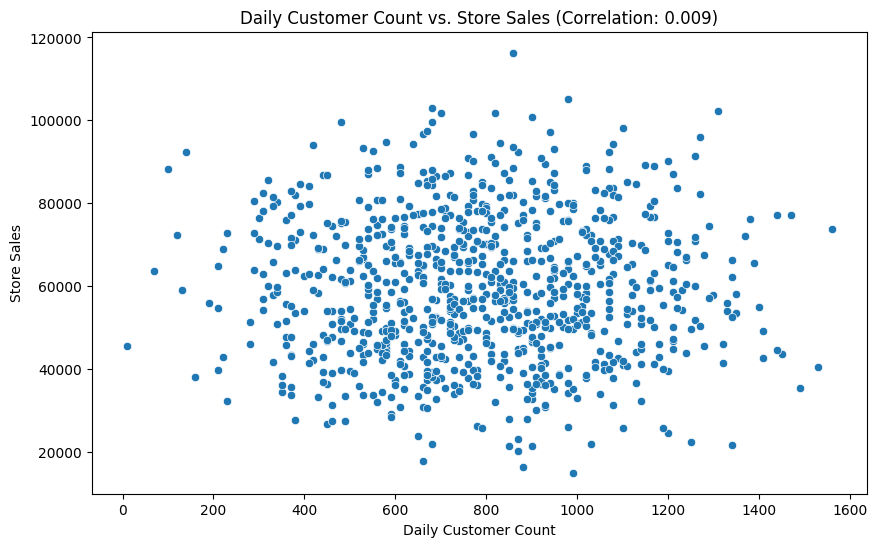

In [ ]:
# Correlation analysis between Daily Customer Count and Store Sales
correlation_customer_sales = df['Daily_Customer_Count'].corr(df['Store_Sales'])
print(f"Correlation between Daily Customer Count and Store Sales: {correlation_customer_sales:.3f}")

# Scatter plot for Daily Customer Count vs. Store Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Customer_Count', y='Store_Sales', data=df)
plt.title(f'Daily Customer Count vs. Store Sales (Correlation: {correlation_customer_sales:.3f})')
plt.xlabel('Daily Customer Count')
plt.ylabel('Store Sales')
plt.show()


<ipython-input-13-a5140cbf93ef>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_size = df.groupby('Store_Size_Category')['Store_Sales'].mean().reset_index()
<ipython-input-13-a5140cbf93ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store_Size_Category', y='Store_Sales', data=avg_sales_by_size, palette='viridis')


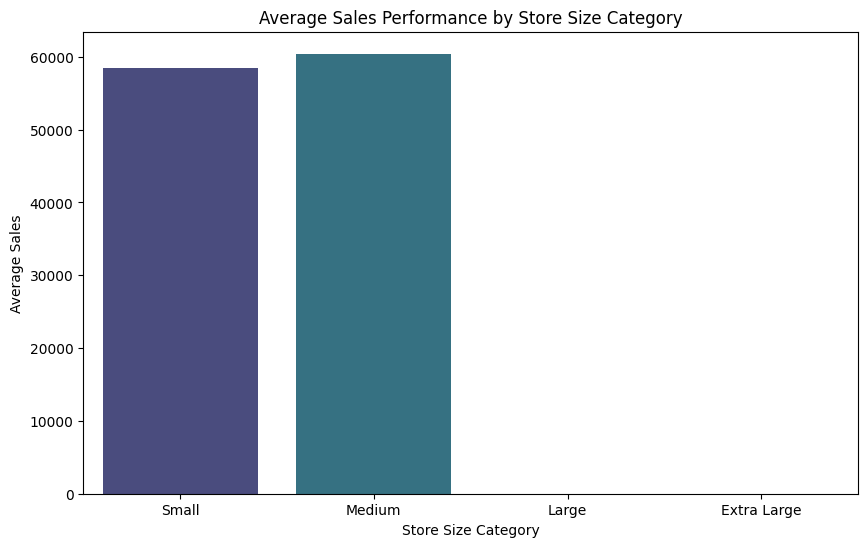

In [ ]:
# Creating size categories based on Store_Area
bins = [0, 1500, 2500, 3500, float('inf')]  # Define thresholds for store size
labels = ['Small', 'Medium', 'Large', 'Extra Large']  # Define labels for each category

# Segment stores into size categories
df['Store_Size_Category'] = pd.cut(df['Store_Area'], bins=bins, labels=labels, include_lowest=True)

# Calculate average sales performance for each size category
avg_sales_by_size = df.groupby('Store_Size_Category')['Store_Sales'].mean().reset_index()

# Plot a bar chart to visualize the average sales performance by store size category
plt.figure(figsize=(10, 6))
sns.barplot(x='Store_Size_Category', y='Store_Sales', data=avg_sales_by_size, palette='viridis')
plt.title('Average Sales Performance by Store Size Category')
plt.xlabel('Store Size Category')
plt.ylabel('Average Sales')
plt.show()


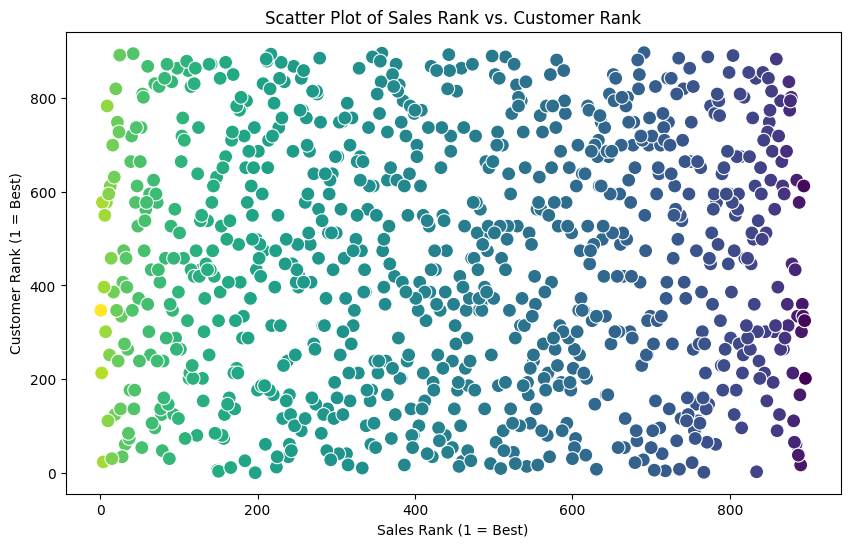

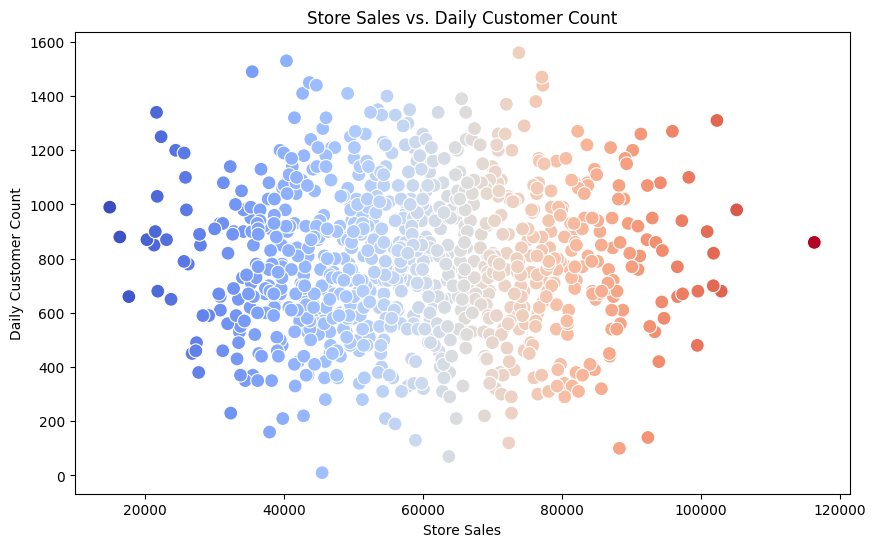

In [ ]:

# Rank stores based on Store Sales and Customer Count
df['Sales_Rank'] = df['Store_Sales'].rank(ascending=False)
df['Customer_Rank'] = df['Daily_Customer_Count'].rank(ascending=False)

# Scatter plot for Sales Rank vs. Customer Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales_Rank', y='Customer_Rank', data=df, s=100, hue='Store_Sales', palette='viridis', legend=False)
plt.title('Scatter Plot of Sales Rank vs. Customer Rank')
plt.xlabel('Sales Rank (1 = Best)')
plt.ylabel('Customer Rank (1 = Best)')
plt.show()

# Scatter plot for Store Sales vs. Daily Customer Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Sales', y='Daily_Customer_Count', data=df, s=100, hue='Store_Sales', palette='coolwarm', legend=False)
plt.title('Store Sales vs. Daily Customer Count')
plt.xlabel('Store Sales')
plt.ylabel('Daily Customer Count')
plt.show()


# **Data Visualization**

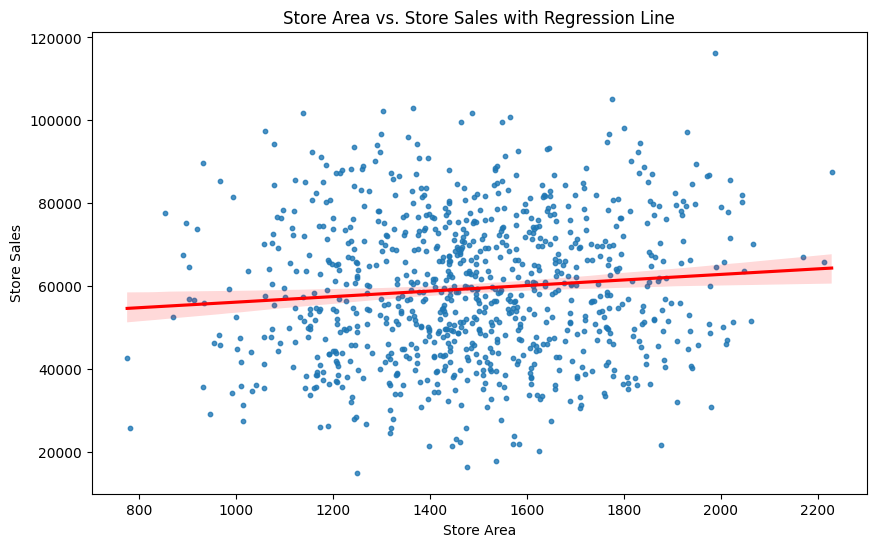

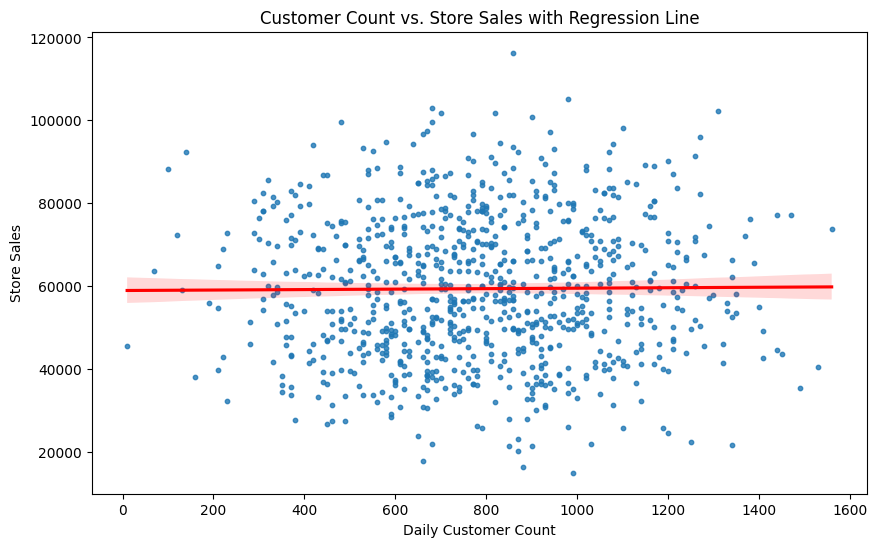

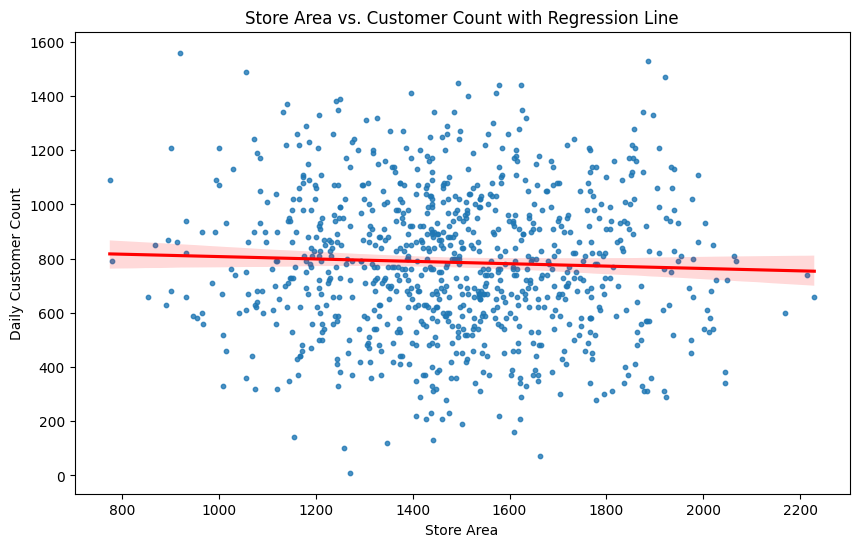

In [ ]:
#Scatter Plots with Regression Lines

# Store Area vs. Store Sales with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Area', y='Store_Sales', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Store Area vs. Store Sales with Regression Line')
plt.xlabel('Store Area')
plt.ylabel('Store Sales')
plt.show()

# Customer Count vs. Store Sales with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Daily_Customer_Count', y='Store_Sales', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Customer Count vs. Store Sales with Regression Line')
plt.xlabel('Daily Customer Count')
plt.ylabel('Store Sales')
plt.show()

# Store Area vs. Customer Count with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Store_Area', y='Daily_Customer_Count', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Store Area vs. Customer Count with Regression Line')
plt.xlabel('Store Area')
plt.ylabel('Daily Customer Count')
plt.show()#

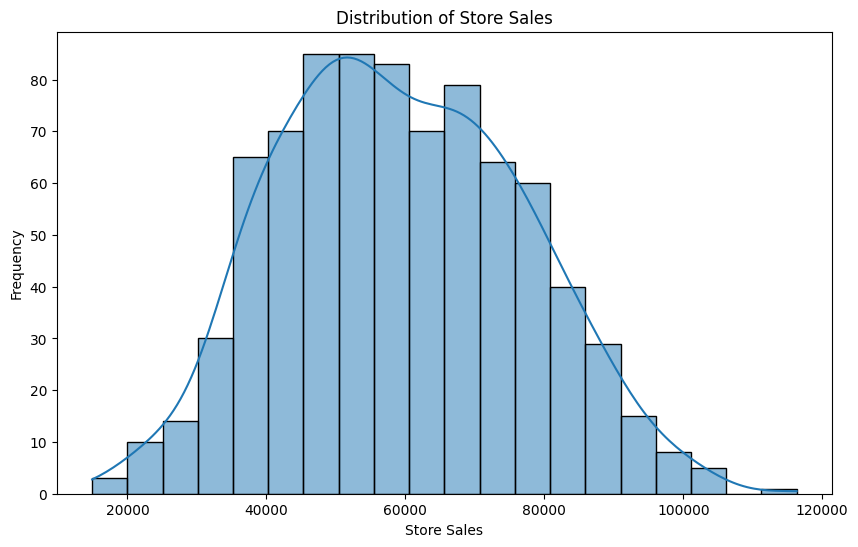

In [ ]:
#Sales Distribution

# Histogram of Store Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Store_Sales'], bins=20, kde=True)
plt.title('Distribution of Store Sales')
plt.xlabel('Store Sales')
plt.ylabel('Frequency')
plt.show()